In [1]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
board_data = pd.read_csv("data/board.csv")
board_data.head()

,id,createdAt,updatedAt,title,content,views,likes,writerId,userId
0,0,2022-01-01,2022-01-01,qRbkSin7,Content,0,0,ciJM4,ZLpnX
1,1,2022-01-01,2022-01-01,fHJhatHR,Content,0,0,CFMVK,mozZZ
2,2,2022-01-01,2022-01-01,eeT0tJOC,Content,1,0,Hs6mb,9bM9z
3,3,2022-01-01,2022-01-01,ps34L30m,Content,1,1,ZpVhO,9bM9z
4,4,2022-01-01,2022-01-01,vH5UQHip,Content,0,1,nOtzI,CJ16Q


In [3]:
df_user_board = board_data.pivot_table(values='likes', index='userId', columns='title', aggfunc='sum').fillna(0)

In [4]:
df_user_board.head()

title,0Psu51R5,6655ipNU,75eyFAKf,A1QMWMUV,DJpokTgr,DkMZziTk,EN35Twj4,EXDw2BFo,Hqqc3xqc,HyW0Hr9O,...,rgjCPSrG,s52DE5gv,tSb5GK38,uGUwoC1o,urzWlSLJ,v1WGF53W,vH5UQHip,vwoMrKY4,xIAIws8Y,zs3d19OU
userId,,,,,,,,,,,,,,,,,,,,,
00GAX,3.0,1.0,2.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,...,3.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0
0dcdH,0.0,2.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,4.0
1c6wb,3.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
203eL,2.0,2.0,0.0,1.0,1.0,2.0,0.0,2.0,3.0,1.0,...,2.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0
2DxaC,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,0.0,1.0,2.0,1.0,0.0,0.0,2.0,1.0,1.0


In [5]:
print(df_user_board.shape)

(50, 50)


In [6]:
df_user_board_T = df_user_board.values.T

In [7]:
SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(df_user_board_T)
matrix.shape

(50, 12)

In [8]:
corr = np.corrcoef(matrix)

In [9]:
corr2 = corr[:50, :50]
corr2.shape

(50, 50)

<Axes: >

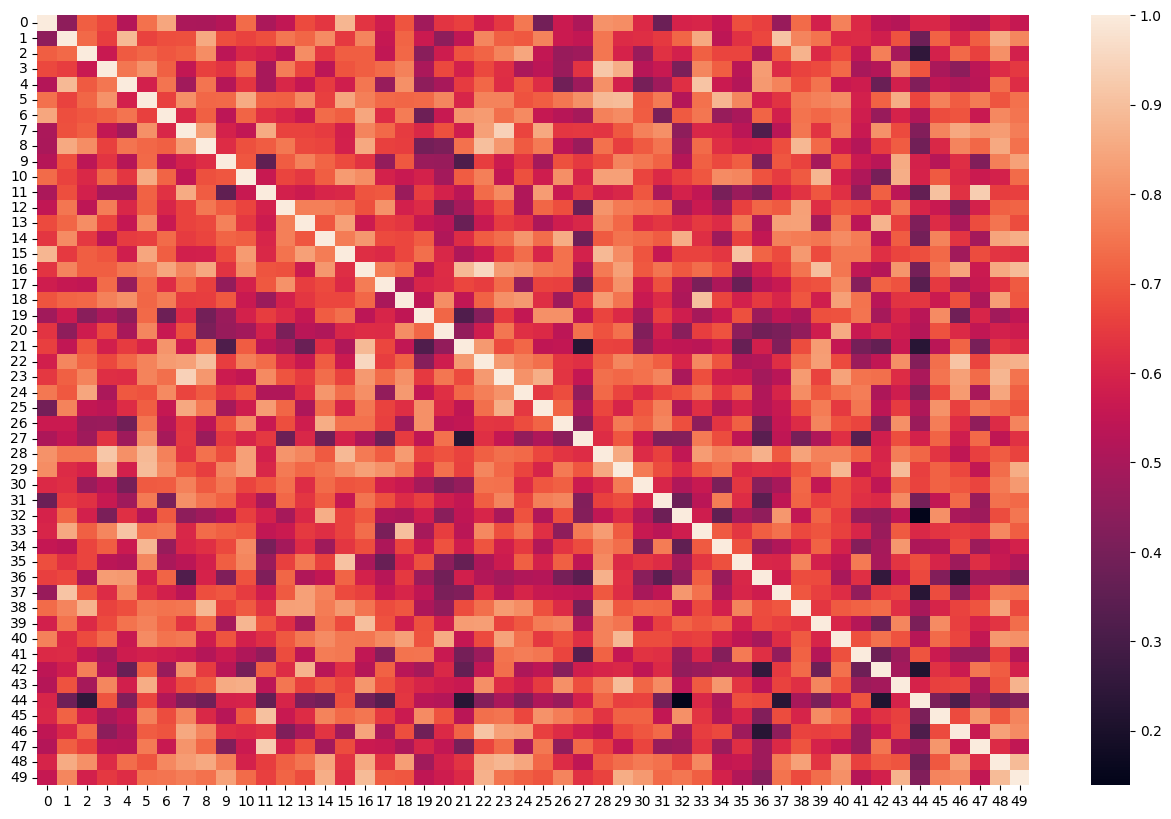

In [10]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr2)

In [11]:
board_title = df_user_board.columns
board_title_list = list(board_title)
print(board_title_list)

['0Psu51R5', '6655ipNU', '75eyFAKf', 'A1QMWMUV', 'DJpokTgr', 'DkMZziTk', 'EN35Twj4', 'EXDw2BFo', 'Hqqc3xqc', 'HyW0Hr9O', 'KBY4GYYj', 'KBjyY5KQ', 'KDPfPSO6', 'Q6P4G579', 'Ru8SRNbj', 'Utx8Qtwf', 'VGNo7jzF', 'VlX8c0ww', 'XM3yA7vS', 'XO0xFlAM', 'Y1I6Lf2i', 'YyikqvID', 'ZJfOxkXC', 'cVYGsPrP', 'cow5IK6P', 'duNqp1vp', 'eeT0tJOC', 'elXTlOa1', 'fHJhatHR', 'gL5VYSeJ', 'gWSx0LNn', 'i4uzMKV0', 'k2UQtzZA', 'kpNyf53w', 'lrbdxvdC', 'nmIBzerY', 'o2KXWlZJ', 'ps34L30m', 'q7wF8Awq', 'qRbkSin7', 'rgjCPSrG', 's52DE5gv', 'tSb5GK38', 'uGUwoC1o', 'urzWlSLJ', 'v1WGF53W', 'vH5UQHip', 'vwoMrKY4', 'xIAIws8Y', 'zs3d19OU']


In [12]:
coffey_hands = board_title_list.index("qRbkSin7")
corr_coffey_hands  = corr[coffey_hands]
list(board_title[(corr_coffey_hands >= 0.8)])[:50]

['KBY4GYYj', 'VGNo7jzF', 'YyikqvID', 'ZJfOxkXC', 'qRbkSin7']